In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/Global-Superstore.xlsx')

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [ ]:
df.columns.unique()

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [ ]:
data=df.drop(['Row ID','Order ID','Customer Name','State','City','Market','Postal Code','Quantity','Order Priority','Shipping Cost','Category','Product Name'],axis=1)

In [ ]:
data.head()

,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,Region,Product ID,Sub-Category,Sales,Discount,Profit
0,2012-07-31,2012-07-31,Same Day,RH-19495,Consumer,United States,East,TEC-AC-10003033,Accessories,2309.650,0.0,762.1845
1,2013-02-05,2013-02-07,Second Class,JR-16210,Corporate,Australia,Oceania,FUR-CH-10003950,Chairs,3709.395,0.1,-288.7650
2,2013-10-17,2013-10-18,First Class,CR-12730,Consumer,Australia,Oceania,TEC-PH-10004664,Phones,5175.171,0.1,919.9710
3,2013-01-28,2013-01-30,First Class,KM-16375,Home Office,Germany,Central,TEC-PH-10004583,Phones,2892.510,0.1,-96.5400
4,2013-11-05,2013-11-06,Same Day,RH-9495,Consumer,Senegal,Africa,TEC-SHA-10000501,Copiers,2832.960,0.0,311.5200


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    51290 non-null  datetime64[ns]
 1   Ship Date     51290 non-null  datetime64[ns]
 2   Ship Mode     51290 non-null  object        
 3   Customer ID   51290 non-null  object        
 4   Segment       51290 non-null  object        
 5   Country       51290 non-null  object        
 6   Region        51290 non-null  object        
 7   Product ID    51290 non-null  object        
 8   Sub-Category  51290 non-null  object        
 9   Sales         51290 non-null  float64       
 10  Discount      51290 non-null  float64       
 11  Profit        51290 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(7)
memory usage: 4.7+ MB


In [ ]:
data['délai_expédition']=(df['Ship Date']-df['Order Date']).dt.days
data.drop(['Ship Date','Order Date'],axis=1)

,Ship Mode,Customer ID,Segment,Country,Region,Product ID,Sub-Category,Sales,Discount,Profit,délai_expédition
0,Same Day,RH-19495,Consumer,United States,East,TEC-AC-10003033,Accessories,2309.650,0.0,762.1845,0
1,Second Class,JR-16210,Corporate,Australia,Oceania,FUR-CH-10003950,Chairs,3709.395,0.1,-288.7650,2
2,First Class,CR-12730,Consumer,Australia,Oceania,TEC-PH-10004664,Phones,5175.171,0.1,919.9710,1
3,First Class,KM-16375,Home Office,Germany,Central,TEC-PH-10004583,Phones,2892.510,0.1,-96.5400,2
4,Same Day,RH-9495,Consumer,Senegal,Africa,TEC-SHA-10000501,Copiers,2832.960,0.0,311.5200,1
...,...,...,...,...,...,...,...,...,...,...,...
51285,Same Day,KE-16420,Corporate,Japan,North Asia,OFF-FA-10000746,Fasteners,65.100,0.0,4.5000,0
51286,Standard Class,ZC-21910,Consumer,United States,Central,OFF-AP-10002906,Appliances,0.444,0.8,-1.1100,4
51287,Same Day,LB-16795,Home Office,United States,West,OFF-EN-10001219,Envelopes,22.920,0.0,11.2308,0
51288,Standard Class,RB-19795,Home Office,Brazil,South,OFF-BI-10000806,Binders,13.440,0.0,2.4000,4


In [ ]:
top5_regions = (data.groupby('Region')['Profit'].sum().sort_values(ascending=False).head())
print(top5_regions)

Region
Central         311403.98164
North           194597.95252
North Asia      165578.42100
South           140355.76618
Central Asia    132480.18700
Name: Profit, dtype: float64


In [ ]:
data['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [ ]:
seg_perf=(data.groupby('Segment')['Profit'].sum().sort_values(ascending=False))
seg_perf

,Profit
Segment,
Consumer,749239.78206
Corporate,441208.32866
Home Office,277009.18056


In [ ]:
data['taux']=data['Profit']/data['Sales']
taux_retour=data.groupby('Sub-Category')['taux'].mean()
taux_retour

,taux
Sub-Category,
Accessories,0.087052
Appliances,-0.001822
Art,0.065659
Binders,-0.001323
Bookcases,0.014882
Chairs,0.024776
Copiers,0.071674
Envelopes,0.089817
Fasteners,0.056290


In [ ]:
data['Mois'] = data['Order Date'].dt.to_period('M')
evolution_par_mois= data.groupby('Mois')[['Sales','Profit']].sum().reset_index()
evolution_par_mois

,Mois,Sales,Profit
0,2011-01,98898.48886,8321.80096
1,2011-02,91152.15698,12417.90698
2,2011-03,145729.36736,15303.56826
3,2011-04,116915.76418,12902.32438
4,2011-05,146747.83610,12183.82870
5,2011-06,215207.38022,23415.24702
6,2011-07,115510.41912,5585.00352
7,2011-08,207581.49122,23713.66772
8,2011-09,290214.45534,35776.88394
9,2011-10,199071.26404,25963.41834


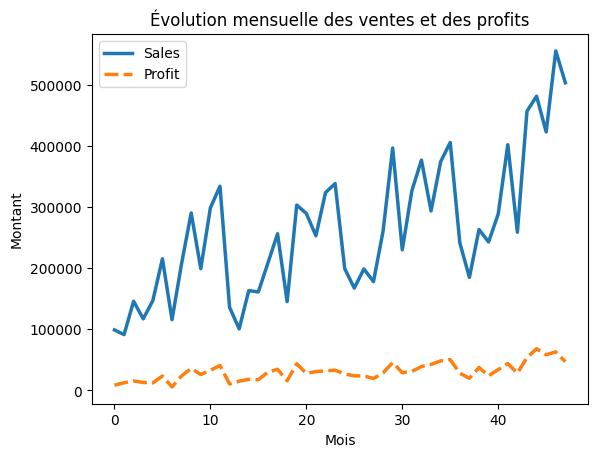

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=evolution_par_mois, palette="tab10", linewidth=2.5)
plt.xlabel("Mois")
plt.ylabel("Montant")
plt.title("Évolution mensuelle des ventes et des profits")
plt.show()


In [ ]:
top10 = df.groupby("Customer Name")[['Profit','Sales']].sum().reset_index().head(10)
top10

,Customer Name,Profit,Sales
0,Aaron Bergman,4683.20800,24644.62750
1,Aaron Hawkins,2450.92904,20759.51384
2,Aaron Smayling,369.16180,14212.62840
3,Adam Bellavance,4979.97690,20186.77840
4,Adam Hart,1902.03342,21718.20142
5,Adam Shillingsburg,1421.27412,15444.67672
6,Adrian Barton,6417.28450,25123.18000
7,Adrian Hane,2081.37928,11405.91788
8,Adrian Shami,1564.49380,11286.05420
9,Aimee Bixby,2926.35430,16201.17460


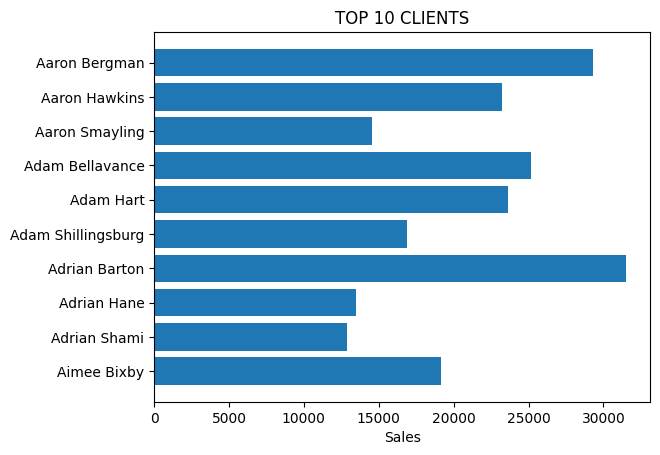

In [ ]:
fig, ax = plt.subplots()

ax.barh(top10['Customer Name'],top10['Sales']+top10['Profit'])
ax.invert_yaxis()
ax.set_xlabel('Sales')
ax.set_title('TOP 10 CLIENTS')

plt.show()

In [ ]:
data.groupby('Region').agg({'délai_expédition':'mean'})

,délai_expédition
Region,
Africa,3.910399
Canada,3.677083
Caribbean,3.973964
Central,4.033642
Central Asia,4.005371
EMEA,3.933386
East,3.909761
North,4.033856
North Asia,3.907613


Text(0.5, 1.0, 'box')

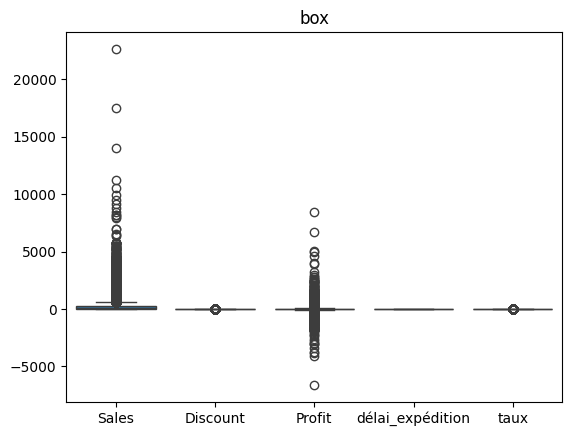

In [ ]:
sns.boxplot(data)
plt.title('box')

In [ ]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(data['Profit']))
print(z_scores)

[4.20773534 1.82045031 5.11278959 ... 0.09969172 0.15034468 0.15378625]


In [ ]:
outliers = data[z_scores > 3]
print(outliers.T)

                                0                    2      \
Order Date        2012-07-31 00:00:00  2013-10-17 00:00:00   
Ship Date         2012-07-31 00:00:00  2013-10-18 00:00:00   
Ship Mode                    Same Day          First Class   
Customer ID                  RH-19495             CR-12730   
Segment                      Consumer             Consumer   
Country                 United States            Australia   
Region                           East              Oceania   
Product ID            TEC-AC-10003033      TEC-PH-10004664   
Sub-Category              Accessories               Phones   
Sales                         2309.65             5175.171   
Discount                          0.0                  0.1   
Profit                       762.1845              919.971   
délai_expédition                    0                    1   
taux                             0.33             0.177766   
Mois                          2012-07              2013-10   

       

In [ ]:
data.describe()

,Order Date,Ship Date,Sales,Discount,Profit,délai_expédition,taux
count,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,246.490581,0.142908,28.610982,3.969370,0.047430
min,2011-01-01 00:00:00,2011-01-03 00:00:00,0.444000,0.000000,-6599.978000,0.000000,-4.733542
25%,2012-06-19 00:00:00,2012-06-23 00:00:00,30.758625,0.000000,0.000000,3.000000,0.000000
50%,2013-07-08 00:00:00,2013-07-12 00:00:00,85.053000,0.000000,9.240000,4.000000,0.169178
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,251.053200,0.200000,36.810000,5.000000,0.333139
max,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.480000,0.850000,8399.976000,7.000000,0.500000
std,NaN,NaN,487.565361,0.212280,174.340972,1.729437,0.465667


In [ ]:
corr_pearson=data['Discount'].corr(data['Profit'], method='pearson')
print(corr_pearson)

-0.31649017182727085


In [ ]:
corr_spearman=data['Discount'].corr(data['Profit'], method='spearman')
print(corr_spearman)

-0.59596928989434


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X=data[['Discount','Segment','Country','Region','Sub-Category','Sales','Discount','délai_expédition']]
y=data["Profit"]
X = pd.get_dummies(X, drop_first=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² (test) = {:.4f}".format(r2))
print("RMSE (test) = {:.4f}".format(rmse))

R² (test) = 0.2601
RMSE (test) = 148.4970


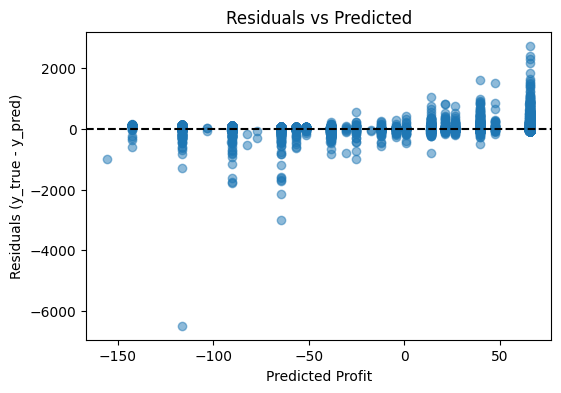

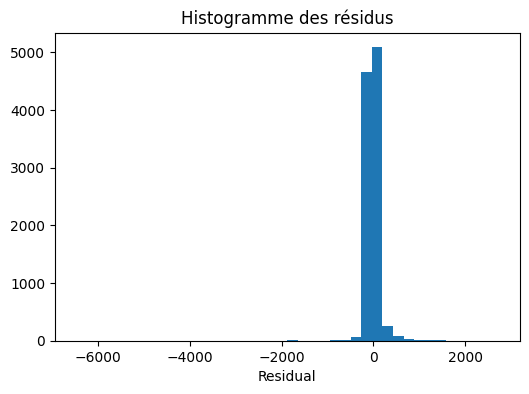

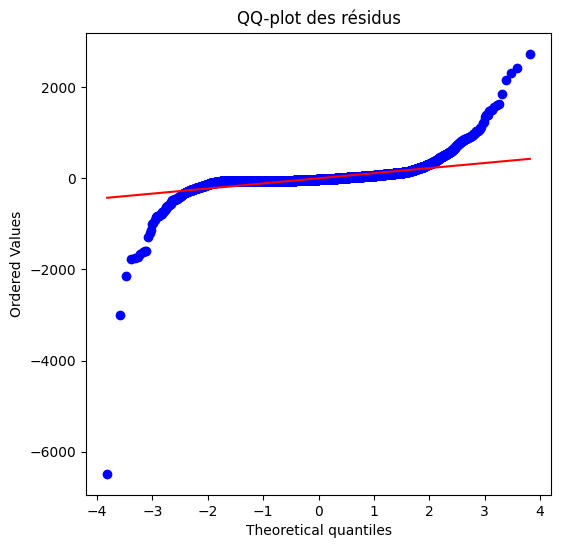

In [ ]:
# Résidus sur l'échantillon test
residuals = y_test - y_pred

# 1) Scatter predicted vs residuals (homoscédasticité)
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='k', linestyle='--')
plt.xlabel('Predicted Profit')
plt.ylabel('Residuals (y_true - y_pred)')
plt.title('Residuals vs Predicted')
plt.show()

# 2) Histogramme des résidus
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=40)
plt.title('Histogramme des résidus')
plt.xlabel('Residual')
plt.show()

# 3) QQ-plot pour vérifier normalité (optionnel)
import scipy.stats as stats
plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ-plot des résidus')
plt.show()
